# SImple FNN on MNIST Dataset



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trainX = mnist.train.images
trainY = mnist.train.labels
#print(trainY)
testX = mnist.test.images
testY = mnist.test.labels

W0806 19:18:01.745059 140486249432960 deprecation.py:323] From <ipython-input-1-8aa1721edebc>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0806 19:18:01.747056 140486249432960 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0806 19:18:01.748554 140486249432960 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0806 19:18:02.165232 140486249432960 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0806 19:18:02.171572 140486249432960 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0806 19:18:02.268492 140486249432960 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
X= tf.placeholder(tf.float32, [None, 784], name= "Input")
Y= tf.placeholder(tf.float32, [None, 10], name= "Output")
keep_prob = tf.placeholder("float")


**Input Layer**

In [0]:

weights_1 = tf.Variable(tf.truncated_normal([784,1024], stddev=0.09),name="Weights1")
biases_1 = tf.Variable(tf.zeros([1024]),name="Bias1")
hidden_1 = tf.nn.relu(tf.matmul(X, weights_1) + biases_1)

**Hidden layer 1**

In [0]:

weights_4 = tf.Variable(tf.truncated_normal([1024,1024], stddev=0.09),name="Weights2")
biases_4 = tf.Variable(tf.zeros([1024]),name="Bias2")
hidden_4 = tf.nn.leaky_relu(tf.matmul(hidden_1, weights_4) + biases_4)

**Hidden Layer 2**

In [0]:

weights_5 = tf.Variable(tf.truncated_normal([1024,1024], stddev=0.09),name="Weights3")
biases_5 = tf.Variable(tf.zeros([1024]),name="Bias3")
hidden_5 = tf.nn.leaky_relu(tf.matmul(hidden_4, weights_5) + biases_5)

**Hidden Layer 3**

In [0]:
weights_6 = tf.Variable(tf.truncated_normal([1024,1024], stddev=0.09),name="Weights4")
biases_6 = tf.Variable(tf.zeros([1024]),name="Bias4")
hidden_6 = tf.nn.relu(tf.matmul(hidden_5, weights_6) + biases_6)

**Hidden Layer 4**

In [0]:

weights_7 = tf.Variable(tf.truncated_normal([1024,1024], stddev=0.09),name="Weights5")
biases_7 = tf.Variable(tf.zeros([1024]),name="Bias5")
hidden_7 = tf.nn.leaky_relu(tf.matmul(hidden_6, weights_7) + biases_7)

**Hidden Layer 5**

In [0]:
 
weights_2 = tf.Variable(tf.truncated_normal([1024,1024], stddev=0.09),name="Weights6")
biases_2 = tf.Variable(tf.zeros([1024]),name="Bias6")
hidden_2 = tf.nn.leaky_relu(tf.matmul(hidden_7, weights_2) + biases_2)

**Output Layer**

In [0]:

weights_3 = tf.Variable(tf.truncated_normal([1024,10], stddev=0.09),name="Weights7")
biases_3 = tf.Variable(tf.zeros([10]),name="Bias7")
Ylogits = tf.matmul(hidden_2, weights_3) + biases_3
output = tf.nn.softmax(Ylogits)

In [0]:

cross_entropy= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels = Y))
optimizer= tf.train.AdamOptimizer(0.0002)
train_step= optimizer.minimize(cross_entropy)
prediction= tf.argmax(output,1)
correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(Y,1))
c=tf.cast(correct_prediction, tf.float32)# taking correct predictin
o=tf.argmax(output,1) # taking the predicted label from the model
t=tf.argmax(Y,1) # taking the true label
h1=tf.argmax(hidden_1,1)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#cls_prediction = tf.argmax(output_logits, axis=1, name='predictions')

In [15]:
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  batch_size = 1000
  epoch = 100
  iterations = int(trainX.shape[0]/ batch_size)
  for e in range(epoch):
   # print(e)
    for i in range(iterations):
     # print(i)
      batch_start= (i * batch_size) % (trainX.shape[0]- batch_size)
      batch_end= batch_start + batch_size
     # print(batch_start, batch_end)
      batch_X = trainX[batch_start:batch_end]
      batch_Y = trainY[batch_start:batch_end]
      train_data = {X:batch_X, Y:batch_Y}
      sess.run(train_step, feed_dict = train_data)
      #print(sess.run(cross_entropy,feed_dict = train_data))
      
      
    ans= sess.run(accuracy, feed_dict={X:testX, Y:testY})
    pred= sess.run(correct_prediction , feed_dict={X:testX, Y:testY})
    cc=sess.run(c , feed_dict={X:testX, Y:testY})
    oo=sess.run(o,feed_dict={X:testX, Y:testY})
    output_taking=sess.run(output,feed_dict={X:testX, Y:testY})
    tt=sess.run(t,feed_dict={X:testX, Y:testY})
    hh1=sess.run(h1,feed_dict={X:testX, Y:testY})
    
 
  ans= sess.run(accuracy, feed_dict={X:testX[:1000], Y:testY[:1000]})
  
  print("Accuracy for complete 1000 Test Set is ",ans*100,"%")
  
  
 

Accuracy for complete 1000 Test Set is  96.20000123977661 %


In [0]:
ind=[]
lab=[]
for i in range(len(pred)):
  if pred[i] == False:
    ind.append(i)
    lab.append(oo[i])

# Lets Look at the images that are classified wrong


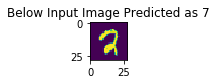

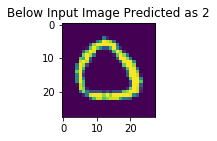

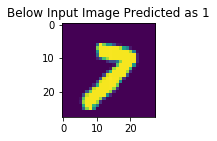

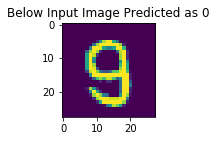

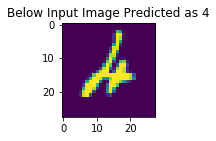

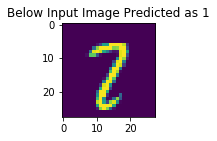

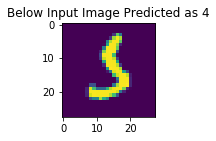

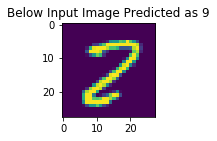

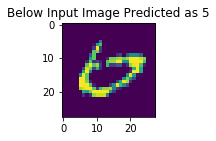

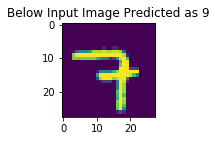

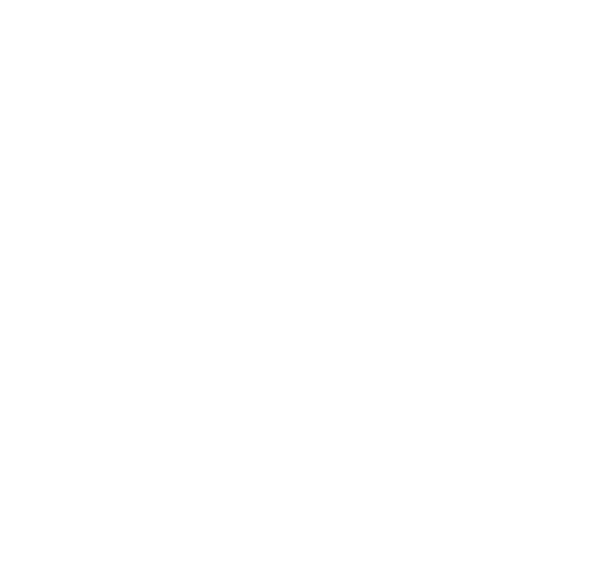

In [118]:
c=0
for i in range(5):
  for j in range(2):
    
      ax=plt.subplot2grid((5, 2), (i, j))
    #if i %2 != 0:
      title= "Below Input Image Predicted as "+str(oo[c])
      ax.set_title(title)
      plt.figure(figsize=(10,10))
      ax.imshow(testX[ind[c]].reshape((28,28)))
      plt.axis('off')
     
      plt.axis('off')
      c+=1
      
    



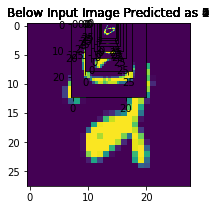